# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from itertools import product

In [80]:
def is_shattered(d, n, S_n):    
    product_list = list(product([0, 1], repeat=n))
    unique_list = product_list[:int(len(product_list)/2)]
    for y in unique_list:
        try: # to avoid all 0 or all 1 in y
            model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
            model.fit(S_n, y)
            if model.score(S_n, y) != 1:
                return False
        except ValueError:
            pass
    return True

### c)

In [81]:
d = 2
n = 4
S_n = np.random.uniform(-1, 1, (n, d))

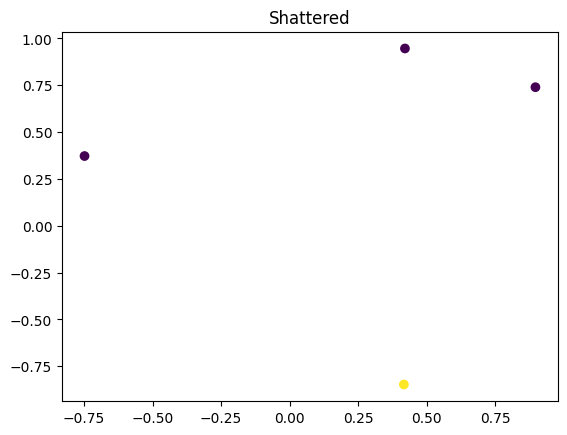

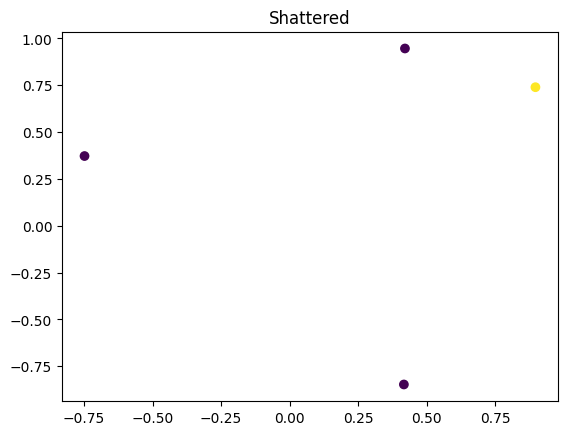

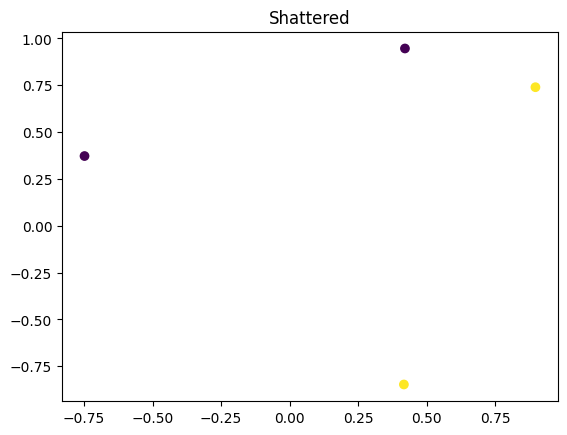

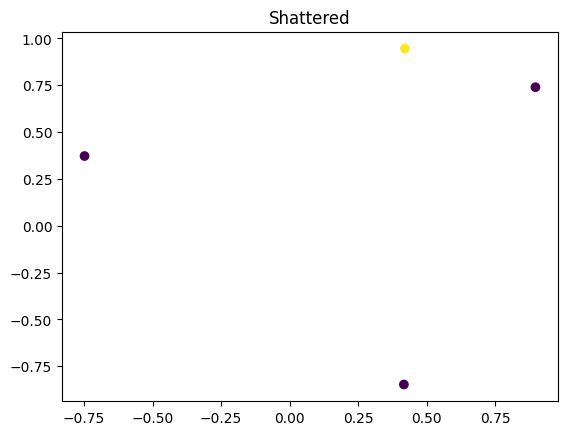

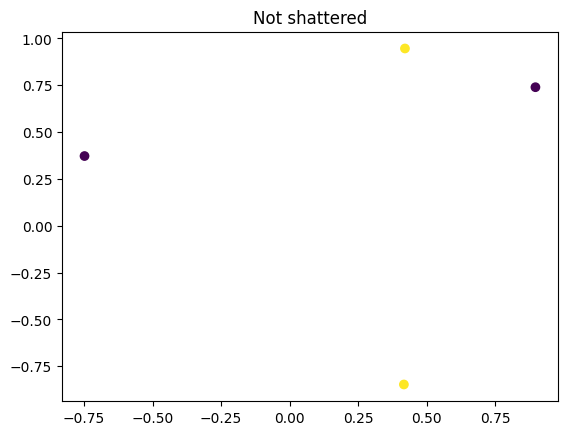

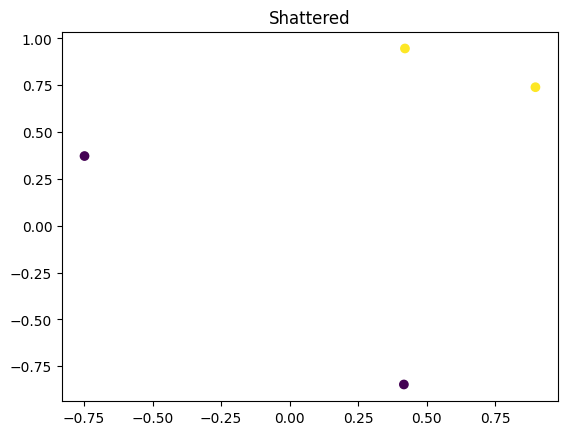

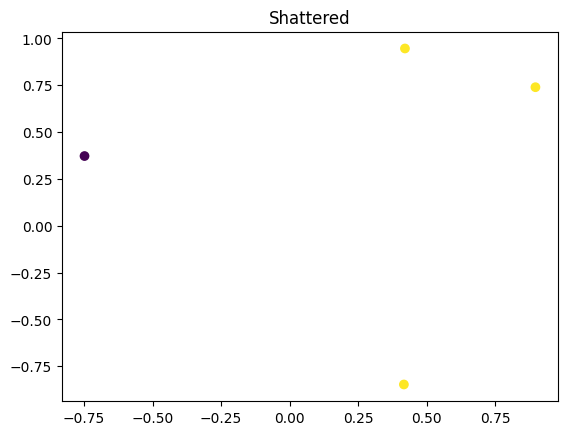

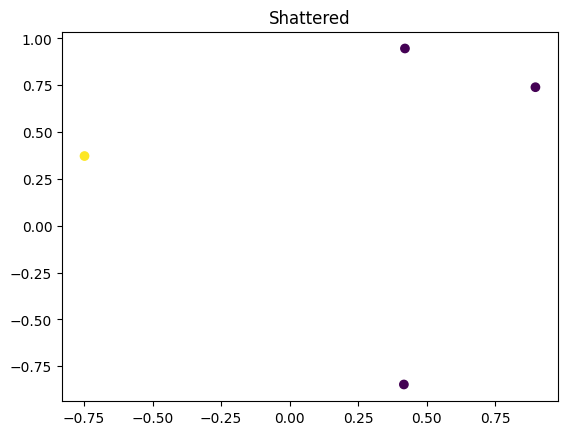

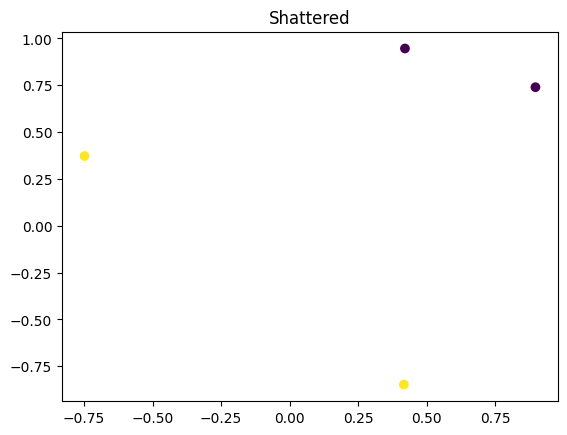

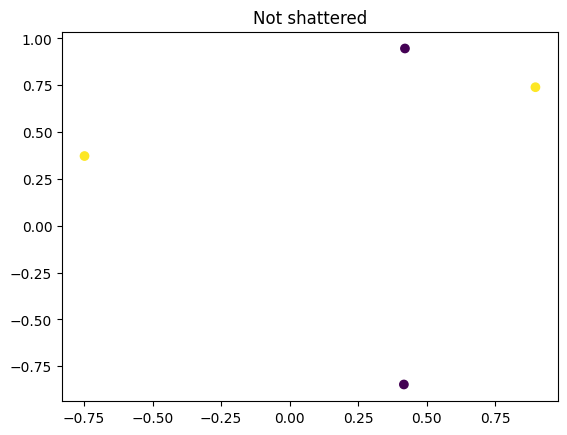

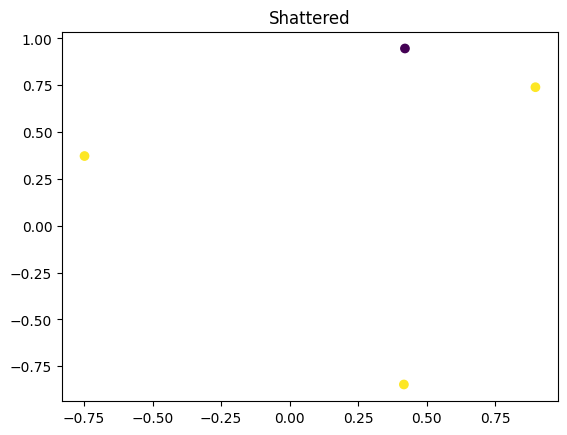

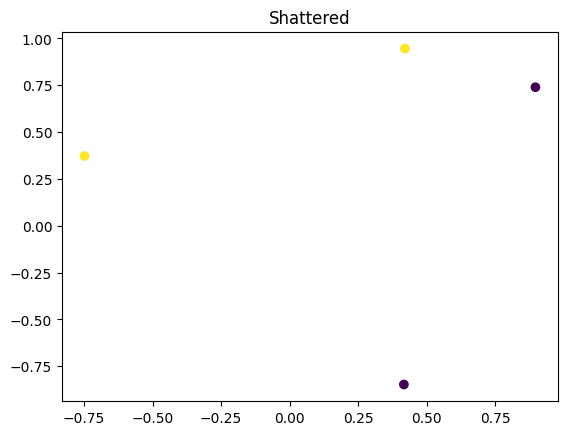

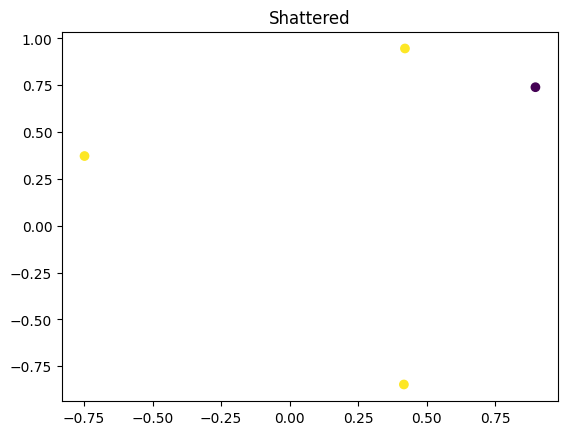

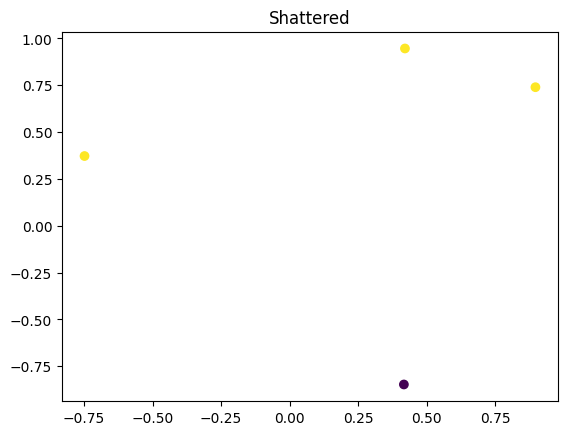

In [82]:
for y in list(product([0, 1], repeat=n)):
    try :
        model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        model.fit(S_n, y)
        if model.score(S_n, y) != 1:
            plt.title('Not shattered')
        else:
            plt.title('Shattered')
        plt.scatter(S_n[:, 0], S_n[:, 1], c=y)
        plt.show()
    except ValueError:
        pass

### d)

In [84]:
from tqdm import trange
N = 50
results = {"d": [], "n":[] ,"shattered": []}
for d in trange(2, 11):
    for n in range(d, d+3):
        shattered = 0
        for i in range(N):
            S_n = np.random.multivariate_normal(mean=np.zeros(d), cov=np.eye(d), size=n)
            if is_shattered(d, n, S_n):
                shattered += 1
        results["d"].append(d)
        results["n"].append(n)
        results["shattered"].append(shattered)

100%|██████████| 9/9 [06:32<00:00, 43.66s/it]


In [85]:
pd.DataFrame(results)

,d,n,shattered
0,2,2,50
1,2,3,49
2,2,4,0
3,3,3,50
4,3,4,50
5,3,5,0
6,4,4,50
7,4,5,49
8,4,6,0
9,5,5,50


CONCLUSION: if n >= d +2, there is no shattering

### e)

In [ ]:
# A hint: change a kernel in SVM

In [87]:
def is_shattered(d, n, S_n):    
    product_list = list(product([0, 1], repeat=n))
    unique_list = product_list[:int(len(product_list)/2)]
    for y in unique_list:
        try: # to avoid all 0 or all 1 in y
            model = SVC(C=10000, shrinking=False, kernel='rbf', tol=1e-5)
            model.fit(S_n, y)
            if model.score(S_n, y) != 1:
                return False
        except ValueError:
            pass
    return True

In [89]:
from tqdm import trange
N = 50
results = {"d": [], "n":[] ,"shattered": []}
d = 2
for n in range(d, 2*d+4):
    shattered = 0
    for i in range(N):
        S_n = np.random.multivariate_normal(mean=np.zeros(d), cov=np.eye(d), size=n)
        if is_shattered(d, n, S_n):
            shattered += 1
    results["d"].append(d)
    results["n"].append(n)
    results["shattered"].append(shattered)

In [90]:
pd.DataFrame(results)

,d,n,shattered
0,2,2,50
1,2,3,50
2,2,4,50
3,2,5,50
4,2,6,50
5,2,7,50
